<a href="https://colab.research.google.com/github/jaswanthBavi/batch1/blob/main/ANNweek_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.8652 - loss: 0.4390 - val_accuracy: 0.9847 - val_loss: 0.0462


Model trained and saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


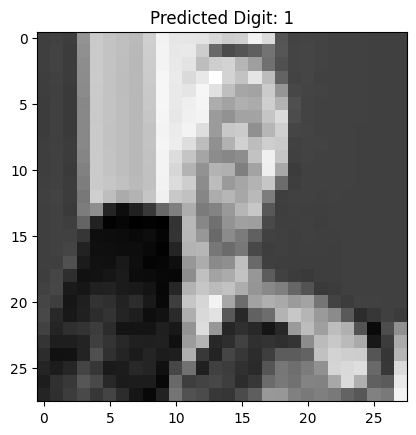

Predicted digit: 1


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))
model.save('digit_recognition_model.h5')
print("Model trained and saved successfully!")
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
model = load_model('digit_recognition_model.h5')
img = Image.open('rajini.jpg').convert('L')
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1).astype('float32')
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()
print(f"Predicted digit: {predicted_digit}")


